<a href="https://colab.research.google.com/github/SubhashMurmu/learning_stuff/blob/main/data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install d2l==1.0.0a1.post0 --quiet


%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [ ]:
import torch

In [ ]:
x = torch.arange(12,dtype=torch.float32)   #to fill in the tensor x
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()  #no of elements in the tensor

12

In [ ]:
x.shape #to get dimension and size

torch.Size([12])

In [ ]:
X = x.reshape(3,4)  #(row , column)
X                   #given a tensor of size n and target (h,w), we know that w=n/h.
                    # if(soemthing , -1) then -1 denotes the above calculation done by the torch library

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2,3,4)) #to make all zeroes

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2,3,4)) #make all ones

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3,4) #random numbers from gaussian distribution

tensor([[ 0.1569, -1.3363, -0.5072, -0.2924],
        [ 0.1408, -0.5381, -0.1850,  0.4016],
        [ 2.2772,  0.1304,  0.5562,  0.6728]])

In [ ]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])  #making my own custom tensor

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
X[-1] , X[1:3] #slicing operation

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1,2] = 17  #indexing
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[:2 , : ] = 12 #(row slicing, column slicing)
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.exp(x)


tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [ ]:
x = torch.tensor([1,2,4,8])
y = torch.tensor([2,2,2,2])
x+y , x-y , x*y , x/y ,x**y

(tensor([ 3,  4,  6, 10]),
 tensor([-1,  0,  2,  6]),
 tensor([ 2,  4,  8, 16]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1,  4, 16, 64]))

In [ ]:
X = torch.arange(12,dtype=torch.float32).reshape((3,4))    #torch.cat((X, Y), dim=0) → Concatenate along rows (vertical stack)
Y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])          #torch.cat((X, Y), dim=1) → Concatenate along columns (horizontal stack)
torch.cat((X,Y) , dim = 0 ) , torch.cat((X,Y) , dim = 1 )

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y  #compare

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

In [ ]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a+b  #Since a and b are 3 × 1 and 1 × 2 matrices, respectively, their shapes do not match up. Broadcasting produces a larger 3 × 2 matrix by replicating matrix a along the columns and matrix b along the rows beore adding them elementwise.

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 139099932363088
id(Z): 139099932363088


In [ ]:
before = id(X)    # if the value of X is not reused in subsequent computations
X += Y            # we can also use X[:] = X + Yor X += Y to reduce the memory overhead of the operation.
id(X) == before

True

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
# Correct version using scalar tensor (no square brackets)
a = torch.tensor(3.5)  # Now `a` is a scalar tensor

print(a)         # tensor(3.5)
print(a.item())  # Returns 3.5 as Python float
print(float(a))  # Converts to float: 3.5
print(int(a))    # Converts to int: 3

tensor(3.5000)
3.5
3.5
3


In [ ]:
import os  # Import the os module to interact with the file system

# Create a directory '../data' if it doesn't already exist
os.makedirs(os.path.join('..', 'data'), exist_ok=True)

# Define the path to the CSV file
data_file = os.path.join('..', 'data', 'house_tiny.csv')

# Open the file in write mode and write the CSV content
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [ ]:
# Split the dataset into input features and target values

# Select the first two columns (NumRooms and RoofType) as input features
inputs = data.iloc[:, 0:2]

# Select the third column (Price) as the target variable
targets = data.iloc[:, 2]

# Convert categorical columns in 'inputs' into one-hot encoded format
# 'dummy_na=True' means it will also create an extra column for missing values (NaNs)
inputs = pd.get_dummies(inputs, dummy_na=True)

# Print the one-hot encoded input features
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean()) #For missing numerical values, one common heuristic is to replace the NaN entries with the mean value of the corresponding column.
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [ ]:
import torch  # Import PyTorch

# Convert the one-hot encoded input DataFrame `inputs` into a NumPy array of type float,
# then wrap it into a PyTorch tensor. This will be the input feature tensor.
X = torch.tensor(inputs.to_numpy(dtype=float))

# Convert the target Series `targets` (Price column) into a NumPy array of type float,
# then wrap it into a PyTorch tensor. This will be the output (label) tensor.
y = torch.tensor(targets.to_numpy(dtype=float))

# Return both tensors (X for inputs, y for labels)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

#VECTOR

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

#MATRICES

In [ ]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T  #to transpose a matrix

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T   #Symmetric matrices are the subset of square matrices that are equal to their own transposes: A = A (transpose).

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone() # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
A * B  #Hadamard Product

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
import torch

a = 2  # 'a' is a scalar (integer)

# Create a tensor with values from 0 to 23 and reshape it into shape (2, 3, 4)
X = torch.arange(24).reshape(2, 3, 4)
# Add scalar 'a' to every element of tensor 'X' using broadcasting
print(a + X)
# Multiply scalar 'a' with every element of tensor 'X' and get the shape of the result
print((a * X).shape)

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])
torch.Size([2, 3, 4])


In [ ]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
A.shape, A.sum(axis=0).shape  # Sum the elements of tensor 'A' along axis 0 (the first dimension)
# This collapses axis 0 by adding together elements at the same position in that dimension,
# resulting in a tensor with one fewer dimension along axis 0

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0, 1]) == A.sum() # Same as A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [ ]:
# Sum the elements of tensor 'A' along axis 1 (the second dimension)
# keepdims=True keeps the reduced dimension as size 1, so the output tensor
# retains the same number of dimensions as 'A'
sum_A = A.sum(axis=1, keepdims=True)

# Return the summed tensor and its shape
sum_A, sum_A.shape


(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [ ]:
# Compute the cumulative sum of tensor 'A' along axis 0 (the first dimension)
# This means for each element along axis 0, sum all previous elements up to the current one
# The result has the same shape as 'A', but each element is the running total down the rows
A.cumsum(axis=0)


tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [ ]:
y = torch.ones(3, dtype = torch.float32)  #Create a tensor 'y' of size 3, filled with ones, with data type float32
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x*y)   #Equivalently, we can calculate the dot product o two vectors by perorming an elementwise multiplication followed by a sum

tensor(3.)

In [ ]:
# A is a 2D tensor (matrix)
# x is a 1D tensor (vector)

# Get the shape of A (rows, columns)
print(A.shape)

# Get the shape of x (length of vector)
print(x.shape)

# Perform matrix-vector multiplication using torch.mv
# Multiplies matrix A by vector x, producing a vector
print(torch.mv(A, x))

# Another way to do matrix-vector multiplication using @ operator
# Equivalent to torch.mv(A, x)
print(A @ x)

torch.Size([2, 3])
torch.Size([3])
tensor([ 5., 14.])
tensor([ 5., 14.])


In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

# Norms

A **norm** is a function $\|\cdot\|$ that maps a vector to a scalar and satisfies the following three properties:

1. **Absolute scalability**: Given any vector $\mathbf{x} \in \mathbb{R}^n$, if we scale it by a scalar $\alpha \in \mathbb{R}$, its norm scales accordingly:
   $$\|\alpha \mathbf{x}\| = |\alpha| \cdot \|\mathbf{x}\|$$

2. **Triangle inequality**: For any vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$:
   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$$

3. **Positive definiteness**: For any vector $\mathbf{x} \in \mathbb{R}^n$:
   $$\|\mathbf{x}\| \geq 0 \text{ with equality iff } \mathbf{x} = \mathbf{0}$$

## ℓ₂ Norm (Euclidean Norm)

Many functions are valid norms, and different norms encode different notions of size. The **Euclidean norm** (familiar from elementary geometry when calculating a right triangle's hypotenuse) is the square root of the sum of squares of a vector's elements.

Formally, this is called the $\ell_{2}$-norm and is expressed as:

$$
\|\mathbf{x}\|_{2} = \sqrt{\sum_{i=1}^{n} x_{i}^{2}}
$$

Key properties:
- Generalizes the notion of "length" to $n$-dimensional spaces
- Invariant under rotations (important for many machine learning applications)
- Computed via the `norm()` method in most linear algebra libraries


In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

## ℓ₁ Norm (Manhattan Norm)

The **ℓ₁ norm** (also known as the *Manhattan distance* or *Taxicab norm*) sums the absolute values of a vector's elements:

$$
\|\mathbf{x}\|_{1} = \sum_{i=1}^{n} |x_{i}|
$$

### Key Characteristics:
- **Robustness**: Less sensitive to outliers compared to the ℓ₂ norm
- **Geometry**: Corresponds to the distance traveled along grid lines (like Manhattan's street grid)
- **Computation**: Implemented by composing absolute value with summation

### Comparison with ℓ₂ Norm:
| Feature        | ℓ₁ Norm                     | ℓ₂ Norm                     |
|----------------|----------------------------|----------------------------|
| Outlier Sensitivity | Less sensitive         | More sensitive             |
| Computation    | Sum of absolute values     | Square root of squared sums |
| Sparsity       | Encourages sparse solutions | Produces smoother solutions |

In [ ]:
torch.abs(u).sum()

tensor(7.)

## General ℓₚ Norms and Matrix Norms

### ℓₚ Norms (Vector Norms)
Both the ℓ₂ and ℓ₁ norms are special cases of the general **ℓₚ norms**:

$$
\|\mathbf{x}\|_{p} = \left(\sum_{i=1}^{n}|x_{i}|^{p}\right)^{1/p}
$$

**Special Cases:**
- *p = 1*: Manhattan norm (ℓ₁)
- *p = 2*: Euclidean norm (ℓ₂)
- *p → ∞*: Maximum norm (ℓ∞)

---

### Matrix Norms
For matrices, we consider two important norms:

#### 1. Frobenius Norm
The simplest matrix norm, which treats the matrix as a vector:

$$
\|\mathbf{X}\|_{\mathrm{F}} = \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}x_{ij}^{2}}
$$

**Properties:**
- Analogous to the ℓ₂ norm for vectors
- Easy to compute
- Invariant under orthogonal transformations

#### 2. Spectral Norm (mentioned)
Measures the maximum scaling a matrix can apply to any vector:

$$
\|\mathbf{X}\|_2 = \max_{\mathbf{v} \neq 0} \frac{\|\mathbf{X}\mathbf{v}\|_2}{\|\mathbf{v}\|_2}
$$

**Key Point:**  
The Frobenius norm is typically computed using `np.linalg.norm` in NumPy, while the spectral norm requires singular value decomposition.

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

#

## Derivatives and Differentiation

### Fundamental Concept
A **derivative** measures how a function changes as its inputs change infinitesimally. In machine learning, derivatives tell us how adjusting parameters affects the loss function.

### Formal Definition
For a scalar function $f: \mathbb{R} \to \mathbb{R}$, the derivative at point $x$ is:

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

**Key Components:**
- $h$: Infinitesimal perturbation
- Numerator: Change in function value
- Limit: Behavior as $h$ approaches zero

### Differentiability
- A function is **differentiable at x** if $f'(x)$ exists
- **Differentiable on a set** if derivatives exist for all points in that set
- **Important Note**: Not all useful functions (e.g., accuracy, AUC) are differentiable

### Practical Implications
- Deep learning relies on differentiable surrogate functions
- Derivatives enable optimization via gradient descent

### Example: Quadratic Function
Consider $u = f(x) = 3x^2 - 4x$:

```python
def f(x):
    return 3*x**2 - 4*x

# Derivative (computed manually)
def df(x):
    return 6*x - 4

In [ ]:
def f(x):
  return 3 * x ** 2 - 4 * x

In [ ]:
# Loop over step sizes h = 10^-1 to 10^-5
for h in 10.0**np.arange(-1, -6, -1):
    # Compute the finite difference approximation of the derivative at x = 1
    # and print h and the result, both formatted to 5 decimal places
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


## Derivative Notations and Rules

### Equivalent Notations
For $y = f(x)$, these all represent the derivative:

$$
f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx}f(x) = Df(x) = D_x f(x)
$$

Where $\frac{d}{dx}$ and $D$ are **differentiation operators**.

---

### Common Derivatives
| Function | Derivative |
|----------|------------|
| $C$ (constant) | $0$ |
| $x^n$ | $nx^{n-1}$ |
| $e^x$ | $e^x$ |
| $\ln x$ | $x^{-1}$ |

---

### Differentiation Rules
For differentiable functions $f(x)$, $g(x)$ and constant $C$:

1. **Constant Multiple Rule**:
   $$\frac{d}{dx}[Cf(x)] = C\frac{d}{dx}f(x)$$

2. **Sum Rule**:
   $$\frac{d}{dx}[f(x) + g(x)] = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)$$

3. **Product Rule**:
   $$\frac{d}{dx}[f(x)g(x)] = f(x)\frac{d}{dx}g(x) + g(x)\frac{d}{dx}f(x)$$

4. **Quotient Rule**:
   $$\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{g(x)\frac{d}{dx}f(x) - f(x)\frac{d}{dx}g(x)}{g^2(x)}$$

---

### Example Application
For $f(x) = 3x^2 - 4x$:


In [79]:

# Import the backend that controls inline display formatting
from matplotlib_inline import backend_inline

# Define a function to use SVG format for all Matplotlib plots
def use_svg_display():
    """
    This function configures matplotlib to display plots in SVG format.
    SVG plots look sharper and scale better in notebooks, especially on high-DPI screens.

    Note: In Google Colab, the '#@save' directive is not needed or allowed unless you're using the D2L (Dive into Deep Learning) book tools.
    """
    backend_inline.set_matplotlib_formats('svg')  # Set plotting format to SVG

In [80]:
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib plots."""
    # Enable SVG format for crisper plots
    d2l.use_svg_display()
    # Set the default figure size in matplotlib’s rcParams
    d2l.plt.rcParams['figure.figsize'] = figsize

In [83]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""

    # Set the label of the x-axis
    axes.set_xlabel(xlabel)
    # Set the label of the y-axis
    axes.set_ylabel(ylabel)

    # Set the scale of the x-axis (e.g., 'linear', 'log')
    axes.set_xscale(xscale)
    # Set the scale of the y-axis (e.g., 'linear', 'log')
    axes.set_yscale(yscale)

    # Set the limits of the x-axis (tuple: (xmin, xmax))
    axes.set_xlim(xlim)
    # Set the limits of the y-axis (tuple: (ymin, ymax))
    axes.set_ylim(ylim)

    # If a legend is provided, display it on the plot
    if legend:
        axes.legend(legend)

    # Enable grid lines on the plot for better readability
    axes.grid()


In [84]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[],
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    # Helper function: returns True if X has only one axis (1D tensor or list)
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    # Convert X to a list of lists if it's 1D
    if has_one_axis(X):
        X = [X]

    # If only Y is provided (no X), assume X is just indices [0, 1, 2, ...]
    if Y is None:
        X, Y = [[]] * len(X), X
    # If Y is 1D, convert it into a list
    elif has_one_axis(Y):
        Y = [Y]

    # Match the number of X and Y series (e.g., 1 X for each Y)
    if len(X) != len(Y):
        X = X * len(Y)

    # Set the figure size
    set_figsize(figsize)

    # Use current axes if none are provided
    if axes is None:
        axes = d2l.plt.gca()
    # Clear the axes before plotting
    axes.cla()

    # Plot each (x, y) pair with corresponding format string from fmts
    for x, y, fmt in zip(X, Y, fmts):
        # If x is empty, use just y (default x will be [0, 1, 2, ...])
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)

    # Set labels, limits, scale, and legend
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

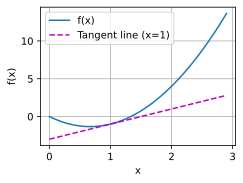

In [85]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Chain Rule in Calculus

### Single-Variable Case
For nested functions $y = f(g(x))$ where both $f(u)$ and $u = g(x)$ are differentiable:

$$
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
$$

**Interpretation**: The derivative of a composition is the product of derivatives at each level.

---

### Multivariable Generalization
For $y = f(\mathbf{u})$ where $\mathbf{u} = g(\mathbf{x})$ with:
- $\mathbf{u} = (u_1, ..., u_m)$
- $\mathbf{x} = (x_1, ..., x_n)$

The partial derivative with respect to $x_i$ becomes:

$$
\frac{\partial y}{\partial x_i} = \sum_{j=1}^m \frac{\partial y}{\partial u_j} \frac{\partial u_j}{\partial x_i}
$$

In matrix form:

$$
\nabla_{\mathbf{x}} y = \mathbf{J} \nabla_{\mathbf{u}} y
$$

Where:
- $\mathbf{J} \in \mathbb{R}^{n \times m}$ is the Jacobian matrix containing $\frac{\partial u_j}{\partial x_i}$
- $\nabla$ denotes the gradient operator

---

### Deep Learning Significance
1. **Key Application**: Enables backpropagation in neural networks
2. **Computational Aspect**: Requires efficient vector-matrix products
3. **Implementation**: Automatic differentiation frameworks handle chain rule automatically

```python
# Pseudo-code for chain rule in autograd systems
def backward(ctx, grad_output):
    # grad_output is ∂L/∂y
    u, = ctx.saved_tensors
    grad_u = grad_output * df_du(u)  # Single-variable chain rule
    grad_x = grad_u * dg_dx(x)      # Continue propagating back
    return grad_x

## Partial Derivatives and Gradients

### Partial Derivatives
For a multivariate function $y = f(x_1, x_2, \ldots, x_n)$, the partial derivative with respect to $x_i$ is:

$$
\frac{\partial y}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, \ldots, x_i + h, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}
$$

**Key Properties:**
- Treat all variables except $x_i$ as constants
- Measures sensitivity to change in one coordinate direction

#### Common Notations:
All these represent the same partial derivative:
$$
\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = f_{x_i} = D_{x_i} f
$$

---

### Gradients
For $f: \mathbb{R}^n \to \mathbb{R}$, the gradient is the vector of all partial derivatives:

$$
\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n}\right]^\top
$$

**Interpretation**:
- Points in direction of steepest ascent
- Zero at local minima/maxima
- Key for optimization in deep learning

---

### Useful Gradient Rules

#### Linear Algebra Rules:
1. For $\mathbf{A} \in \mathbb{R}^{m \times n}$:
   $$\nabla_{\mathbf{x}} \mathbf{Ax} = \mathbf{A}^\top$$
   $$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$$

2. For square $\mathbf{A} \in \mathbb{R}^{n \times n}$:
   $$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{Ax} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$$

3. Special case:
   $$\nabla_{\mathbf{x}} \|\mathbf{x}\|^2 = 2\mathbf{x}$$

#### Frobenius Norm:
For matrices:
$$\nabla_{\mathbf{X}} \|\mathbf{X}\|_F^2 = 2\mathbf{X}$$

---

### Implementation Example
```python
import numpy as np

# Gradient of quadratic form
def quadratic_gradient(A, x):
    return (A + A.T) @ x

# Gradient of squared L2 norm
def l2_gradient(x):
    return 2 * x

# Example usage
A = np.array([[1, 2], [3, 4]])
x = np.array([1, 2])
print(quadratic_gradient(A, x))  # Output: [11 16]
print(l2_gradient(x))            # Output: [2 4]

Let’s assume that we are interested in differentiating the unction y = 2xTx with respect to
the column vector x. To start, we assign x an initial value.

In [86]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [87]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad # The gradient is None by default

In [88]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

We can now take the gradient of y with respect to x by calling its backward method. Next,
we can access the gradient via x’s grad attribute

In [89]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])